In [1]:
import tensorflow as tf
print(tf.__version__)

2.11.0


In [2]:
#import some basic libraries
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd


In [3]:
dataset=pd.read_csv('Churn_Modelling.csv')

In [4]:
dataset.head()

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


In [5]:
## Divide the dataset into independent and dependent features
x=dataset.iloc[:,3:13]
x.head()

,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary
0,619,France,Female,42,2,0.00,1,1,1,101348.88
1,608,Spain,Female,41,1,83807.86,1,0,1,112542.58
2,502,France,Female,42,8,159660.80,3,1,0,113931.57
3,699,France,Female,39,1,0.00,2,0,0,93826.63
4,850,Spain,Female,43,2,125510.82,1,1,1,79084.10


In [6]:
y=dataset.iloc[:,13]
y.head()

0    1
1    0
2    1
3    0
4    0
Name: Exited, dtype: int64

In [7]:
## Feature Engineering
geography=pd.get_dummies(x['Geography'],drop_first=True)
gender=pd.get_dummies(x['Gender'],drop_first=True)

In [8]:
##Concatenate variables with dataframe

In [9]:
x.drop(['Geography','Gender'],axis=1,inplace=True)

In [10]:
x.head()

,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary
0,619,42,2,0.00,1,1,1,101348.88
1,608,41,1,83807.86,1,0,1,112542.58
2,502,42,8,159660.80,3,1,0,113931.57
3,699,39,1,0.00,2,0,0,93826.63
4,850,43,2,125510.82,1,1,1,79084.10


In [11]:
x=pd.concat([x,geography,gender],axis=1)

In [12]:
## Splitting the dataset in train and test dataset
from sklearn.model_selection import train_test_split

In [13]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=0)

In [14]:
## Feature Scalinng
from sklearn.preprocessing import StandardScaler

In [15]:
sc=StandardScaler()
x_train=sc.fit_transform(x_train)

In [16]:
x_test=sc.transform(x_test)

In [17]:
x_train

array([[ 0.16958176, -0.46460796,  0.00666099, ..., -0.5698444 ,
         1.74309049, -1.09168714],
       [-2.30455945,  0.30102557, -1.37744033, ...,  1.75486502,
        -0.57369368,  0.91601335],
       [-1.19119591, -0.94312892, -1.031415  , ..., -0.5698444 ,
        -0.57369368, -1.09168714],
       ...,
       [ 0.9015152 , -0.36890377,  0.00666099, ..., -0.5698444 ,
        -0.57369368,  0.91601335],
       [-0.62420521, -0.08179119,  1.39076231, ..., -0.5698444 ,
         1.74309049, -1.09168714],
       [-0.28401079,  0.87525072, -1.37744033, ...,  1.75486502,
        -0.57369368, -1.09168714]])

In [18]:
x_test

array([[-0.55204276, -0.36890377,  1.04473698, ...,  1.75486502,
        -0.57369368, -1.09168714],
       [-1.31490297,  0.10961719, -1.031415  , ..., -0.5698444 ,
        -0.57369368, -1.09168714],
       [ 0.57162971,  0.30102557,  1.04473698, ..., -0.5698444 ,
         1.74309049, -1.09168714],
       ...,
       [-0.74791227, -0.27319958, -1.37744033, ..., -0.5698444 ,
         1.74309049,  0.91601335],
       [-0.00566991, -0.46460796, -0.33936434, ...,  1.75486502,
        -0.57369368,  0.91601335],
       [-0.79945688, -0.84742473,  1.04473698, ...,  1.75486502,
        -0.57369368,  0.91601335]])

In [19]:
x_train.shape

(8000, 11)

In [20]:
## Part 2
##Creating the ANN

In [41]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import LeakyReLU,PReLU,ELU,ReLU
from tensorflow.keras.layers import Dropout

In [42]:
### Lets intialize ANN
classifier=Sequential()

In [43]:
##Adding the input layer

In [44]:
classifier.add(Dense(units=11,activation='relu'))

In [45]:
##adding first hidden layer
classifier.add(Dense(units=7,activation='relu'))
classifier.add(Dropout(0.2))

In [46]:
## adding second hidden layer
classifier.add(Dense(units=6,activation='relu'))
classifier.add(Dropout(0.3))

In [47]:
## adding output layer
classifier.add(Dense(units=1,activation='sigmoid'))

In [48]:
import tensorflow
opt=tensorflow.keras.optimizers.Adam(learning_rate=0.01)

In [49]:
classifier.compile(optimizer=opt,loss='binary_crossentropy',metrics=['accuracy'])

In [50]:
#Early stoping
import tensorflow as tf
early_stoping=tf.keras.callbacks.EarlyStopping(
    monitor="val_loss",
    min_delta=0.001,
    patience=20,
    verbose=1,
    mode="auto",
    baseline=None,
    restore_best_weights=False,
    start_from_epoch=0,
)

In [51]:
model_history=classifier.fit(x_train,y_train,validation_split=0.33,batch_size=10,epochs=1000,callbacks=early_stoping)

Epoch 1/1000
536/536 [==============================] - 1s 1ms/step - loss: 0.4703 - accuracy: 0.8001 - val_loss: 0.4070 - val_accuracy: 0.8152
Epoch 2/1000
536/536 [==============================] - 1s 1ms/step - loss: 0.4162 - accuracy: 0.8233 - val_loss: 0.3817 - val_accuracy: 0.8387
Epoch 3/1000
536/536 [==============================] - 1s 1ms/step - loss: 0.4035 - accuracy: 0.8294 - val_loss: 0.3816 - val_accuracy: 0.8357
Epoch 4/1000
536/536 [==============================] - 1s 1ms/step - loss: 0.3978 - accuracy: 0.8345 - val_loss: 0.3822 - val_accuracy: 0.8360
Epoch 5/1000
536/536 [==============================] - 1s 1ms/step - loss: 0.3951 - accuracy: 0.8365 - val_loss: 0.3724 - val_accuracy: 0.8387
Epoch 6/1000
536/536 [==============================] - 1s 1ms/step - loss: 0.3978 - accuracy: 0.8354 - val_loss: 0.3724 - val_accuracy: 0.8448
Epoch 7/1000
536/536 [==============================] - 1s 1ms/step - loss: 0.3917 - accuracy: 0.8369 - val_loss: 0.3817 - val_accuracy:

In [52]:
model_history.history.keys()

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])

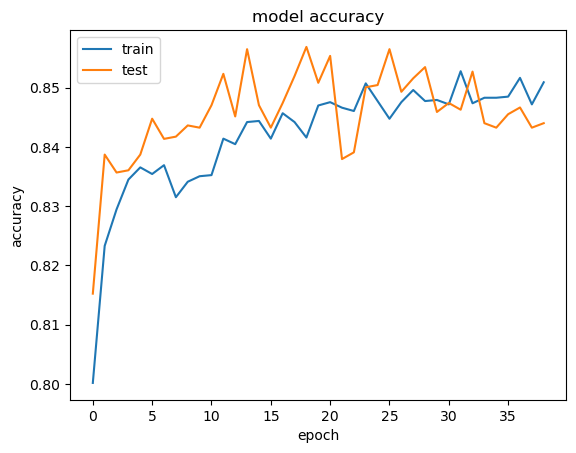

In [53]:
## Summary for accuracy
plt.plot(model_history.history['accuracy'])
plt.plot(model_history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train','test'],loc='upper left')

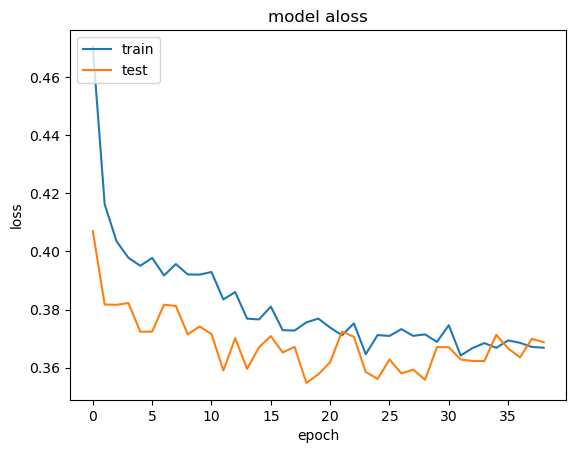

In [54]:
plt.plot(model_history.history['loss'])
plt.plot(model_history.history['val_loss'])
plt.title('model aloss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train','test'],loc='upper left')

In [55]:
## part 3 :- Making the prediction
#predicting the test set results
y_pred=classifier.predict(x_test)
y_pred=(y_pred>=0.5)

63/63 [==============================] - 0s 758us/step


In [56]:
## make the confusion matrix
from sklearn.metrics import confusion_matrix
cm=confusion_matrix(y_test,y_pred)
cm

array([[1575,   20],
       [ 274,  131]], dtype=int64)

In [57]:
## calculate the accuracy
from sklearn.metrics import accuracy_score

In [58]:
score=accuracy_score(y_pred,y_test)

In [59]:
score

0.853

In [60]:
## get the weights
classifier.get_weights()

[array([[ 1.81892022e-01,  5.61054707e-01,  8.76973271e-02,
         -4.64662313e-01, -2.30219617e-01,  2.04369724e-01,
          5.16472936e-01,  2.78780431e-01, -2.65635867e-02,
          1.69796348e-01, -9.38003600e-01],
        [ 2.00204760e-01,  5.10588825e-01, -2.34669399e+00,
          1.30961984e-01,  1.61688611e-01,  1.35032308e+00,
         -1.59072459e+00,  2.41397572e+00, -4.66841340e-01,
         -3.32946730e+00, -1.26106954e+00],
        [ 4.01347399e-01, -1.18668854e+00,  1.29131779e-01,
          6.91374540e-01,  1.30150929e-01, -1.33989662e-01,
          1.09702957e+00,  2.43919715e-01,  3.97663176e-01,
          1.40519351e-01,  7.46344849e-02],
        [ 1.53496712e-01,  1.78373587e+00, -2.72476435e-01,
          6.71565652e-01, -3.12212420e+00,  3.25472623e-01,
         -2.04571772e+00, -8.67754042e-01, -2.64836574e+00,
         -6.90090477e-01, -3.58522832e-01],
        [ 3.76317072e+00,  1.95731175e+00,  1.46538049e-01,
         -1.28609109e+00, -3.72201061e+00, -

# Execute this in google colab to get info about what model is best for your dataset 

 best_model=compare_models()